# **Séries Temporais com DeepAR**

## Tratamento da Base de Dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os

In [3]:
base = pd.read_csv('train.csv')
base.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
base = pd.read_csv('train.csv', parse_dates=['datetime'], index_col=0)
base

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [5]:
base.drop(columns=['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered'], axis=1, inplace=True)
base

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168


In [6]:
base = base.groupby(pd.Grouper(freq='D')).sum()
base

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


In [7]:
base_teste = base.copy()
base_teste.shape

(719, 1)

In [8]:
base_treinamento = base.iloc[0:689,:]
base_treinamento

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-11-15,5445
2012-11-16,5698
2012-11-17,5629


In [9]:
dt_data_inicial = pd.Timestamp('2011-01-01')
dt_data_final_treinamento = pd.Timestamp('2012-11-19')
dt_previsao_maxima = pd.Timestamp('2012-12-19')

faixa_treinamento = (dt_data_inicial, dt_data_final_treinamento)
faixa_teste = (dt_data_inicial, dt_previsao_maxima)

In [10]:
faixa_treinamento

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-11-19 00:00:00'))

In [11]:
faixa_teste

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 00:00:00'))

In [12]:
serie_temporal_treinamento = []
serie_temporal_teste = []

serie_temporal_treinamento.append(base_treinamento[faixa_treinamento[0]:faixa_treinamento[1]]['count'])
serie_temporal_teste.append(base_teste[faixa_teste[0]:faixa_teste[1]]['count'])

In [13]:
type(serie_temporal_teste), type(serie_temporal_treinamento)

(list, list)

In [14]:
serie_temporal_treinamento

[datetime
 2011-01-01     985
 2011-01-02     801
 2011-01-03    1349
 2011-01-04    1562
 2011-01-05    1600
               ... 
 2012-11-15    5445
 2012-11-16    5698
 2012-11-17    5629
 2012-11-18    4669
 2012-11-19    5499
 Freq: D, Name: count, Length: 689, dtype: int64]

In [15]:
serie_temporal_teste

[datetime
 2011-01-01     985
 2011-01-02     801
 2011-01-03    1349
 2011-01-04    1562
 2011-01-05    1600
               ... 
 2012-12-15    5047
 2012-12-16    3786
 2012-12-17    4585
 2012-12-18    5557
 2012-12-19    5267
 Freq: D, Name: count, Length: 719, dtype: int64]

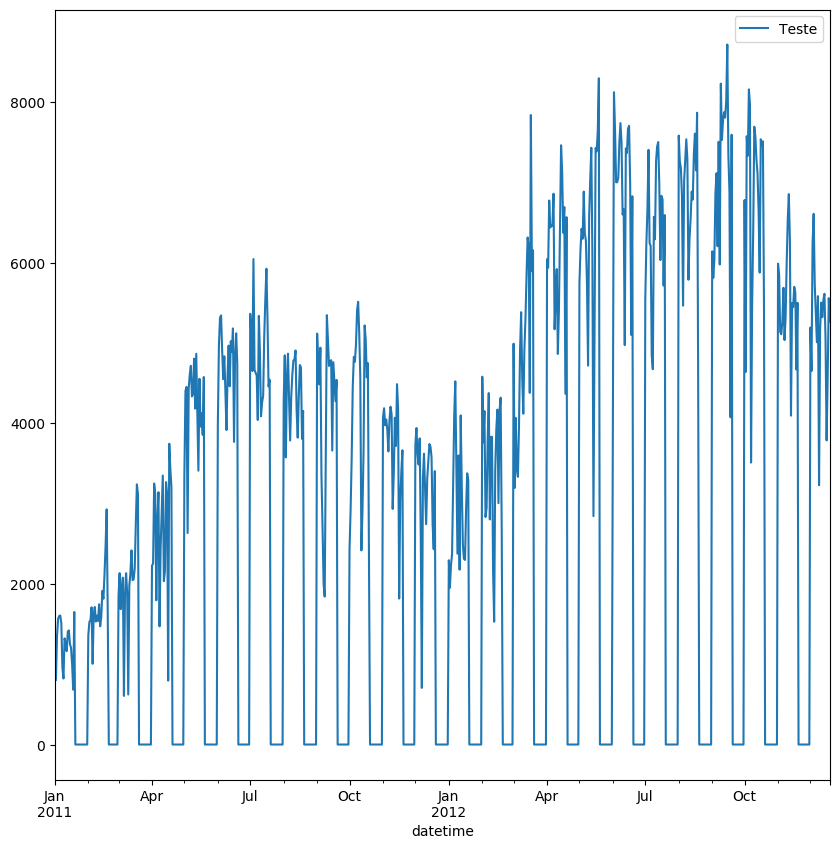

In [17]:
plt.figure(figsize=(10,10))
serie_temporal_teste[0].plot(label="Teste")
serie_temporal_treinamento[0].
plt.legend()
plt.show()